In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

In [63]:
df = pd.read_csv('sales_data python.csv')
print(df.head())

         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [34]:
df.shape

(110, 5)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        110 non-null    object 
 1   Store       110 non-null    int64  
 2   Category    110 non-null    object 
 3   Units_Sold  110 non-null    int64  
 4   Unit_Price  110 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.4+ KB


In [37]:
df.describe()

,Store,Units_Sold,Unit_Price
count,110.000000,110.000000,110.000000
mean,102.018182,35.309091,121.444545
std,0.823751,12.986758,125.711453
min,101.000000,15.000000,19.990000
25%,101.000000,25.250000,19.990000
50%,102.000000,32.000000,49.990000
75%,103.000000,44.250000,299.990000
max,103.000000,62.000000,299.990000


In [38]:
df.columns.to_list()

['Date', 'Store', 'Category', 'Units_Sold', 'Unit_Price']

In [39]:
df.isnull().sum()

Date          0
Store         0
Category      0
Units_Sold    0
Unit_Price    0
dtype: int64

In [40]:
#valores duplicados
df.nunique()

Date          19
Store          3
Category       3
Units_Sold    24
Unit_Price     3
dtype: int64

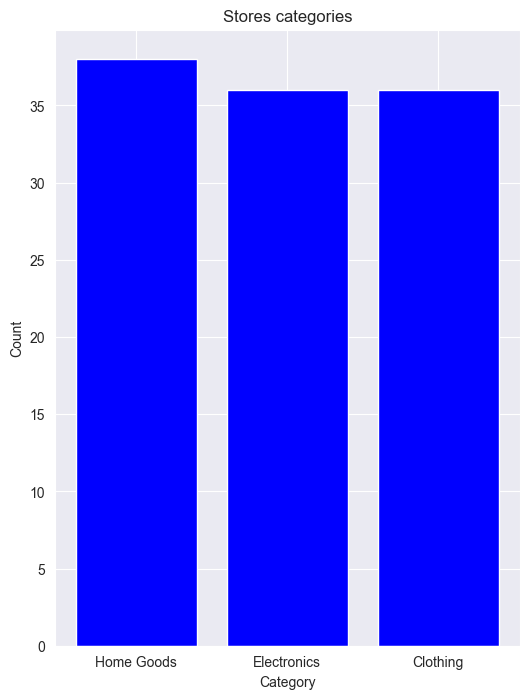

In [41]:
#plot the categories

categories_counts = df['Category'].value_counts()

plt.figure(figsize=(6,8))
plt.bar(categories_counts.index, categories_counts,color='b')
plt.title("Stores categories")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

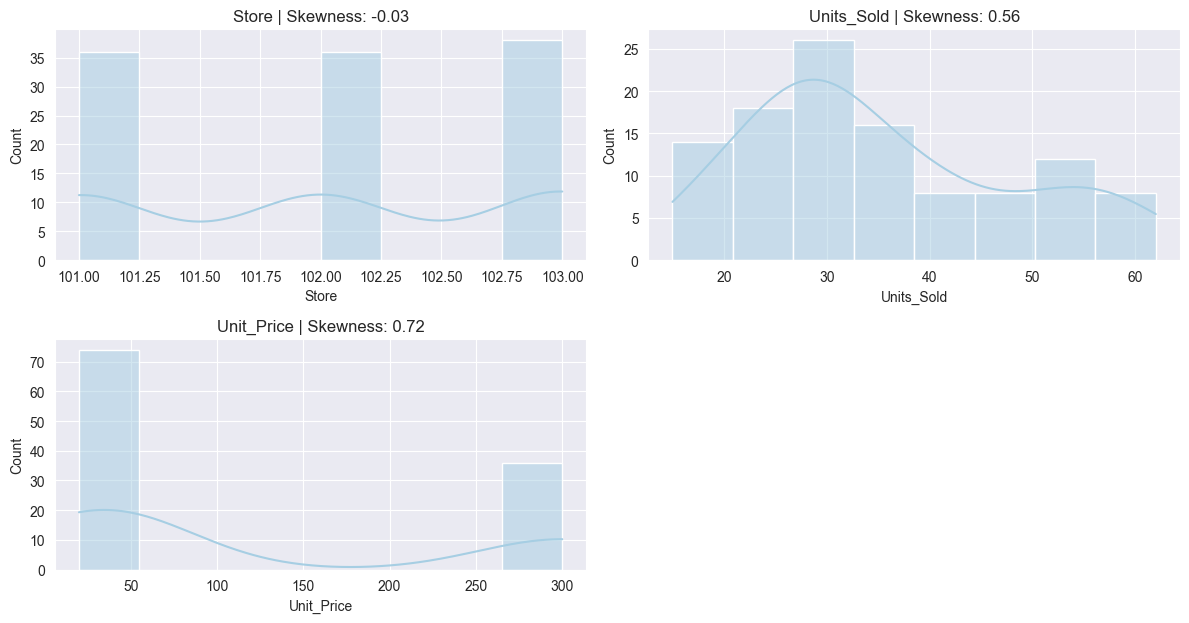

In [42]:
#kernel de densidad para comprender la varianza en el dataset
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17400\864297659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Store', y='Units_Sold', data=df, palette='viridis')


Text(94.22222222222221, 0.5, 'Units_Sold')

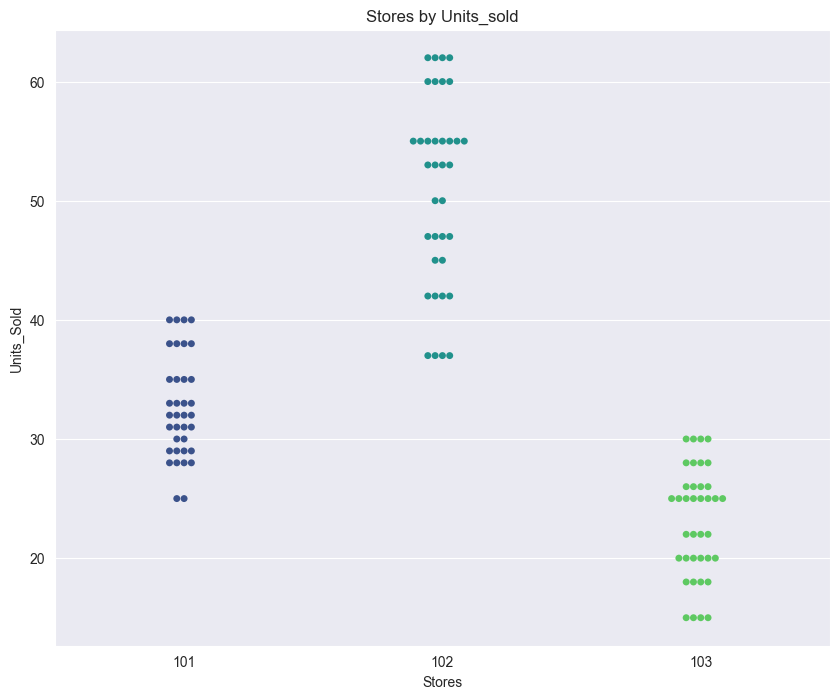

In [43]:
plt.figure(figsize=(10,8))

sns.swarmplot(x='Store', y='Units_Sold', data=df, palette='viridis')

plt.title('Stores by Units_sold')
plt.xlabel('Stores')
plt.ylabel('Units_Sold')

Mostrar la distribución de una variable individual

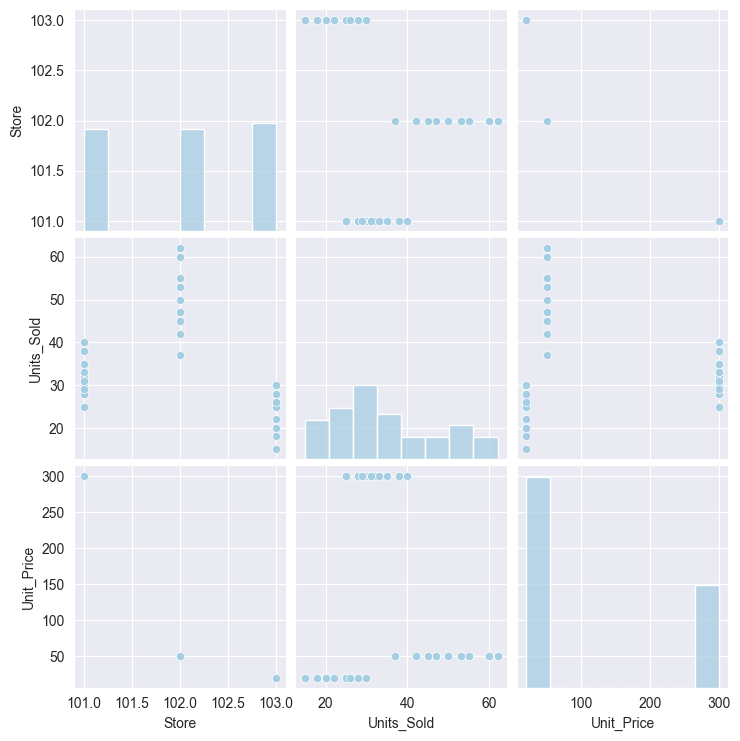

In [44]:
sns.set_palette("Paired")

plt.Figure(figsize=(10,8))

sns.pairplot(df)

plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17400\1538192144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Store", y="Units_Sold", data=df, palette="Paired", alpha=0.7,inner='box')


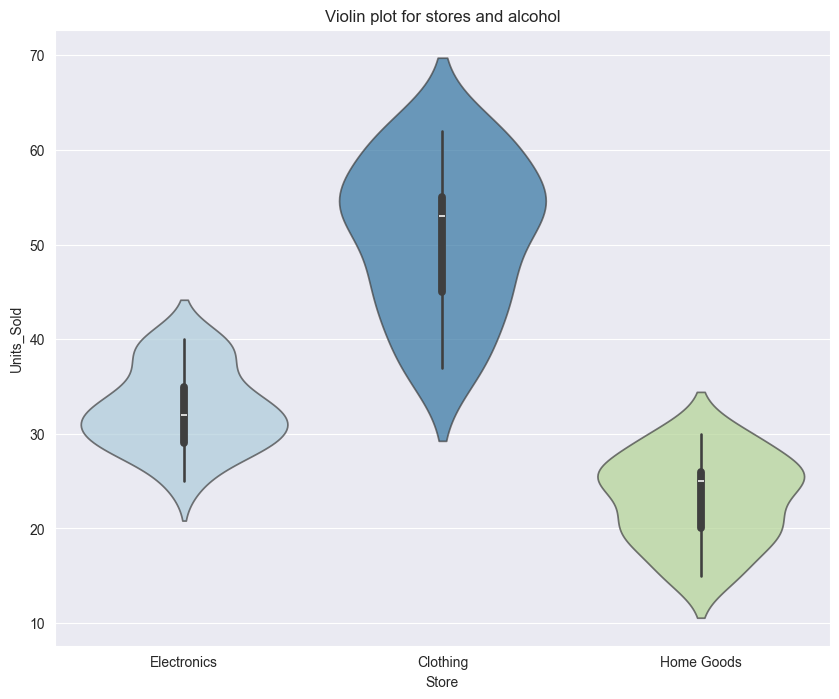

In [45]:
df['Store'] = df['Category'].astype(str)

plt.figure(figsize=(10,8))

sns.violinplot(x="Store", y="Units_Sold", data=df, palette="Paired", alpha=0.7,inner='box')

plt.title("Violin plot for stores and alcohol")
plt.show()

<Axes: xlabel='Store', ylabel='Units_Sold'>

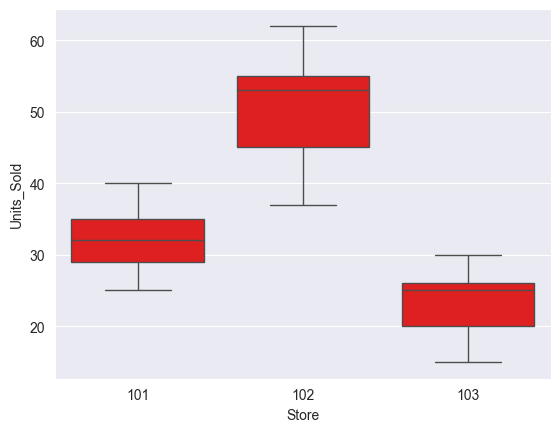

In [65]:
sns.boxplot(x='Store', y='Units_Sold', data=df,color='r')

Correlation matrix

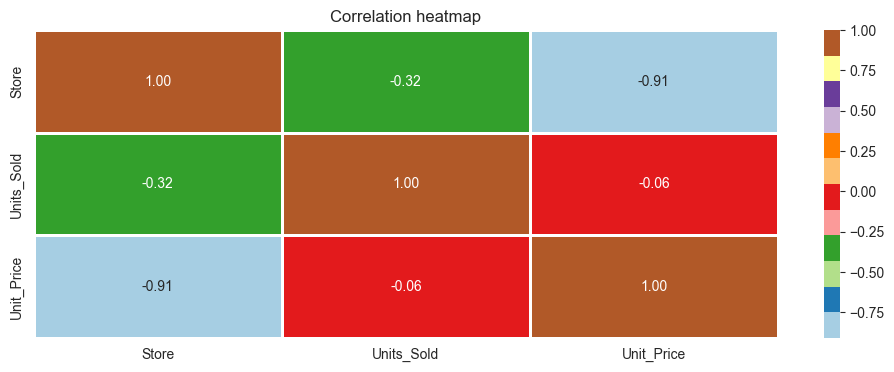

In [66]:
numeric_df = df.select_dtypes(include=['number']) #select numeric columns

if not numeric_df.empty: #check if there are any numeric columns
    plt.figure(figsize=(12, 4))
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap="Paired", linewidths=2)
    plt.title("Correlation heatmap") 
    plt.show()
else:
    print("No numeric columns found in the DataFrame.")


Comenzar a realizar diferentes actividades con la base de datos

Graficas de series de tiempo

In [67]:
#datos duplicados
duplicados= df.duplicated()
print(df[duplicados])

           Date  Store     Category  Units_Sold  Unit_Price
30   2024-01-02    103   Home Goods          30       19.99
31   2024-01-03    101  Electronics          40      299.99
32   2024-01-03    102     Clothing          55       49.99
33   2024-01-03    103   Home Goods          25       19.99
34   2024-01-04    101  Electronics          35      299.99
35   2024-01-04    102     Clothing          60       49.99
36   2024-01-04    103   Home Goods          15       19.99
37   2024-01-05    101  Electronics          28      299.99
38   2024-01-05    102     Clothing          42       49.99
39   2024-01-05    103   Home Goods          18       19.99
40   2024-01-06    101  Electronics          32      299.99
41   2024-01-06    102     Clothing          37       49.99
42   2024-01-06    103   Home Goods          22       19.99
43   2024-01-07    101  Electronics          29      299.99
44   2024-01-07    102     Clothing          53       49.99
45   2024-01-07    103   Home Goods     

In [68]:
bd_sin_duplicados = df.drop_duplicates()
print(bd_sin_duplicados)

           Date  Store     Category  Units_Sold  Unit_Price
0    2024-01-01    101  Electronics          30      299.99
1    2024-01-01    102     Clothing          45       49.99
2    2024-01-01    103   Home Goods          20       19.99
3    2024-01-02    101  Electronics          25      299.99
4    2024-01-02    102     Clothing          50       49.99
5    2024-01-02    103   Home Goods          30       19.99
6    2024-01-03    101  Electronics          40      299.99
7    2024-01-03    102     Clothing          55       49.99
8    2024-01-03    103   Home Goods          25       19.99
9    2024-01-04    101  Electronics          35      299.99
10   2024-01-04    102     Clothing          60       49.99
11   2024-01-04    103   Home Goods          15       19.99
12   2024-01-05    101  Electronics          28      299.99
13   2024-01-05    102     Clothing          42       49.99
14   2024-01-05    103   Home Goods          18       19.99
15   2024-01-06    101  Electronics     

In [69]:
#Ordenar los datos
bd_ordenada = bd_sin_duplicados.sort_values(by='Date')
print(bd_ordenada)

           Date  Store     Category  Units_Sold  Unit_Price
0    2024-01-01    101  Electronics          30      299.99
1    2024-01-01    102     Clothing          45       49.99
2    2024-01-01    103   Home Goods          20       19.99
3    2024-01-02    101  Electronics          25      299.99
4    2024-01-02    102     Clothing          50       49.99
5    2024-01-02    103   Home Goods          30       19.99
6    2024-01-03    101  Electronics          40      299.99
7    2024-01-03    102     Clothing          55       49.99
8    2024-01-03    103   Home Goods          25       19.99
9    2024-01-04    101  Electronics          35      299.99
10   2024-01-04    102     Clothing          60       49.99
11   2024-01-04    103   Home Goods          15       19.99
14   2024-01-05    103   Home Goods          18       19.99
13   2024-01-05    102     Clothing          42       49.99
12   2024-01-05    101  Electronics          28      299.99
15   2024-01-06    101  Electronics     

In [70]:
fig = px.line(bd_ordenada, x='Date', y='Units_Sold', color='Store', title='Units_Sold by Store')
fig.show()

In [71]:
fig = px.line(bd_ordenada, x='Date', y='Units_Sold', color='Category')
fig.show()

In [72]:
fig = px.bar(bd_ordenada, x='Category',y='Units_Sold')
fig.show()

Convertir fechas a dias de la semana

In [76]:
bd_ordenada['Date'] = pd.to_datetime(bd_ordenada['Date'])
bd_ordenada['Day_Week'] = bd_ordenada['Date'].dt.day_name(locale='en_US')
print(bd_ordenada.head())

        Date  Store     Category  Units_Sold  Unit_Price Day_Week
0 2024-01-01    101  Electronics          30      299.99   Monday
1 2024-01-01    102     Clothing          45       49.99   Monday
2 2024-01-01    103   Home Goods          20       19.99   Monday
3 2024-01-02    101  Electronics          25      299.99  Tuesday
4 2024-01-02    102     Clothing          50       49.99  Tuesday


In [ ]:
# bd_ordenada = bd_ordenada.drop('Dia_Semana', axis=1)

In [81]:
bd_ordenada.head()

,Date,Store,Category,Units_Sold,Unit_Price,Day_Week
0,2024-01-01,101,Electronics,30,299.99,Monday
1,2024-01-01,102,Clothing,45,49.99,Monday
2,2024-01-01,103,Home Goods,20,19.99,Monday
3,2024-01-02,101,Electronics,25,299.99,Tuesday
4,2024-01-02,102,Clothing,50,49.99,Tuesday


Graficas

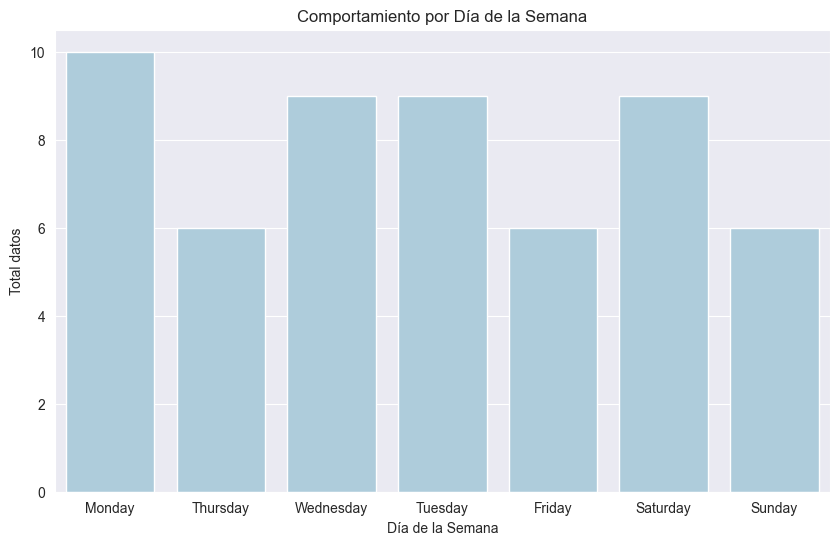

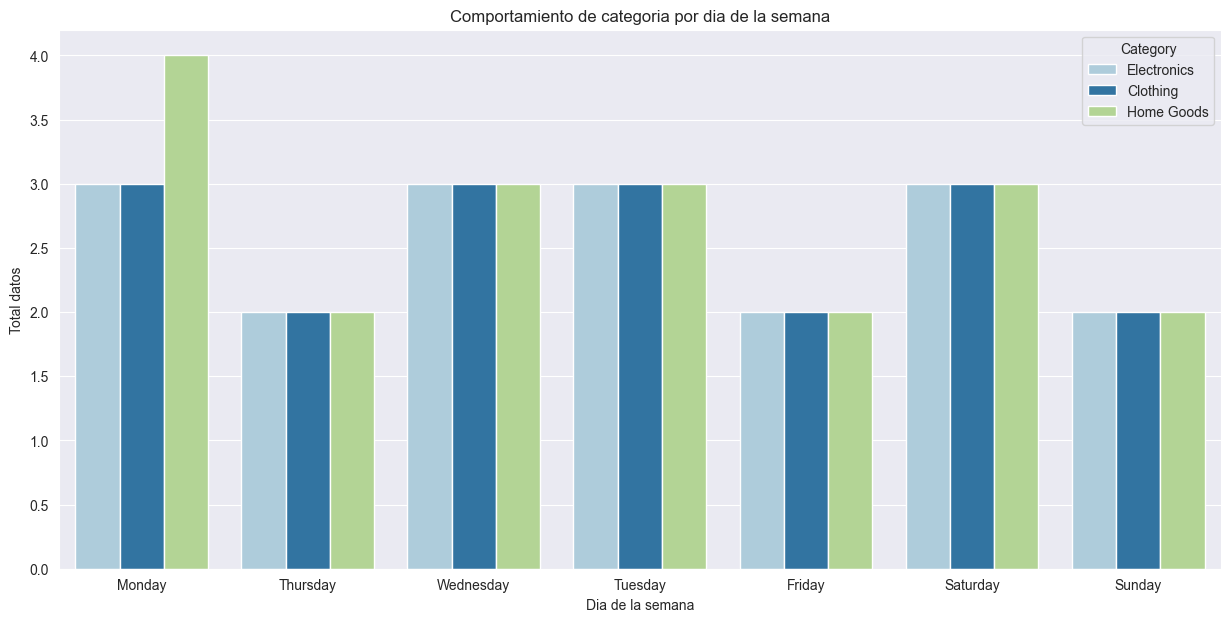

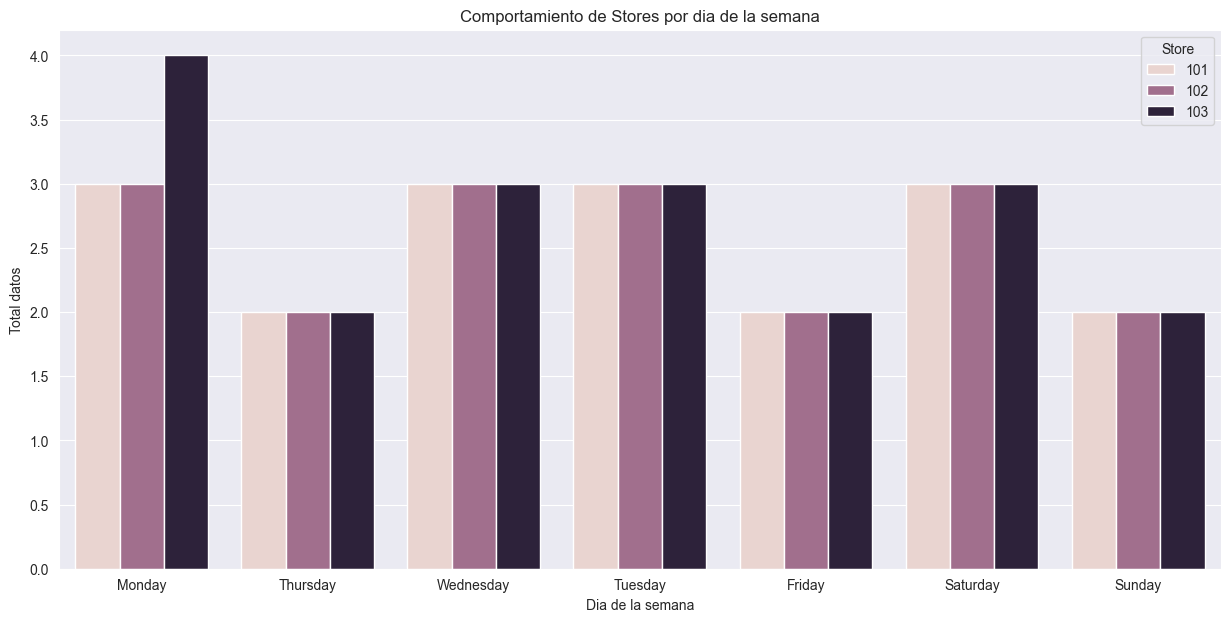

In [82]:
#por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_Week', data=bd_ordenada, order=['Monday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Comportamiento por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total datos')
plt.show()

#por dia de la semana y categoria
plt.figure(figsize=(15,7))
sns.countplot(x='Day_Week', hue='Category', data=bd_ordenada, order=['Monday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Comportamiento de categoria por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Total datos')
plt.show()

#por dia de la semana y Stores
plt.figure(figsize=(15,7))
sns.countplot(x='Day_Week', hue='Store', data=bd_ordenada, order=['Monday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Comportamiento de Stores por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Total datos')
plt.show()

Graficas por promedio de unidades vendidas

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17400\98077890.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




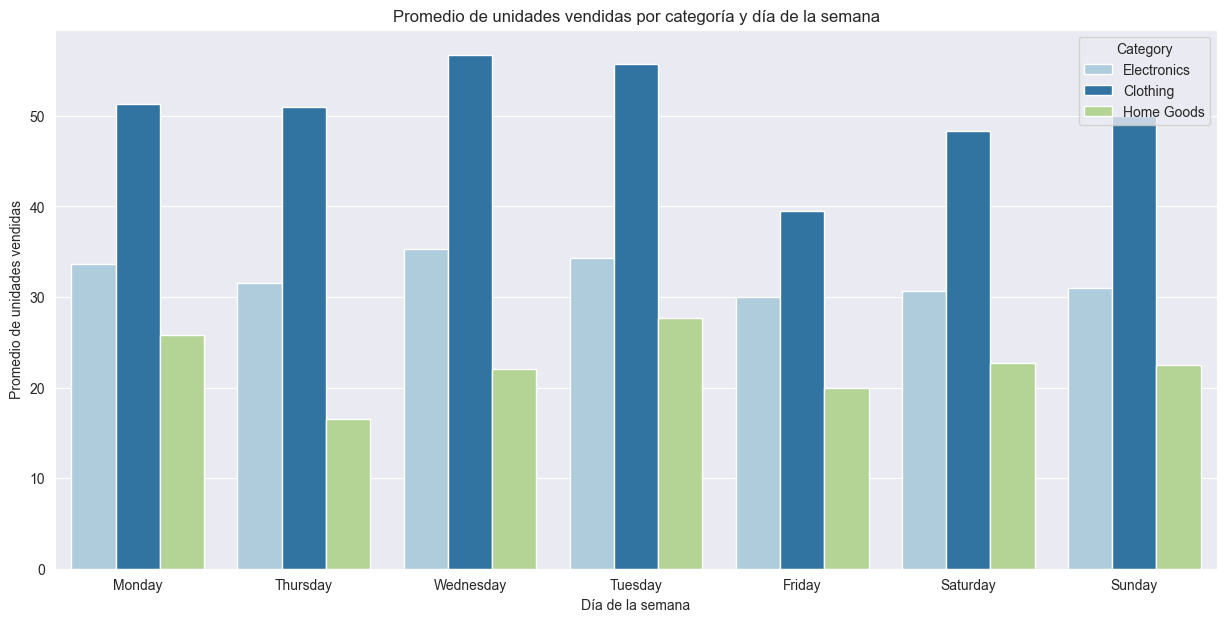

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17400\98077890.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




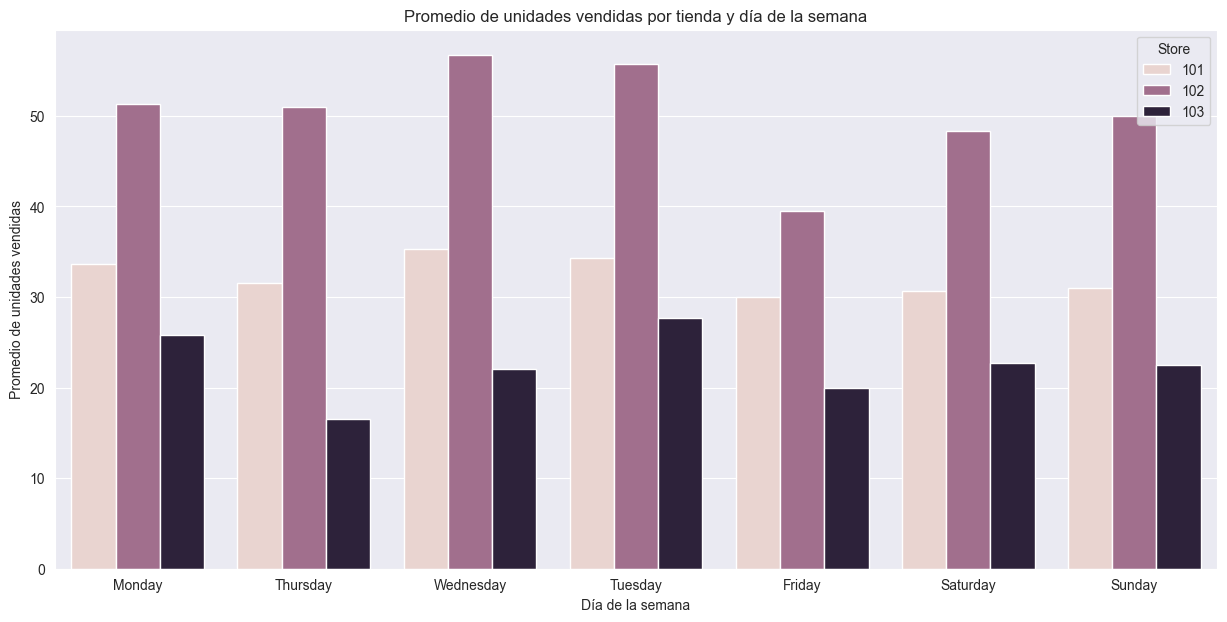

In [ ]:
# Por día de la semana y categoría 
plt.figure(figsize=(15, 7))
sns.barplot(x='Day_Week', y='Units_Sold', hue='Category', data=bd_ordenada, order=['Monday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'], ci=None)
plt.title('Promedio de unidades vendidas por categoría y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Promedio de unidades vendidas')
plt.show()

# Por día de la semana y tiendas
plt.figure(figsize=(15, 7))
sns.barplot(x='Day_Week', y='Units_Sold', hue='Store', data=bd_ordenada, order=['Monday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'], ci=None)
plt.title('Promedio de unidades vendidas por tienda y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Promedio de unidades vendidas')
plt.show()

resumen del EDA